# Shoprite X Data Analysis

## Overview

### Business Context

- Two promotional campaigns are being tested (Group A and Group B)

- Targeted 5k customers in both groups and withheld 5k control groups for both groups.

- How did each of these groups perform against their control groups?

- Which promotional campaign was more successful?

### Primary Metric

- Available metrics from the data are 'Sales Value', 'Transactions', and 'Quantity'

- These metrics are highly correlated to each other (refer to **Exploratory Data Analysis (EDA) > Correlations between Metrics**)

- The high correlation implies that analysis performed using any one of these metrics will yield similar inferences for the other metrics

- Given the retail business context, 'Sales Value' is chosen as the primary success metric for this investigation

## Import Packages

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower
import random

random.seed(10)  # initialise random seed for reproducability
sns.set(style="darkgrid")  

## Import Data and Create Datasets

In [41]:
data = pd.read_csv('./data/data.csv', sep=';')
redeemedvsnonredeemed = pd.read_csv('./data/redeemedvsnonredeemed.csv', sep=';')

ControlA = data[data.Group == 'ControlA']
ControlB = data[data.Group == 'ControlB']
TargetA = data[data.Group == 'TargetA']
TargetB = data[data.Group == 'TargetB']
TargetA['Sales Value'] = TargetA['Sales Value']

dataA = data[(data.DateLabel == 'Week 1 - 9') & ((data.Group == 'TargetA') | (data.Group == 'ControlA'))][['Date', 'Sales Value', 'Group']]
dfA = pd.DataFrame(dataA)

dataB = data[(data.DateLabel == 'Week 1 - 9') & ((data.Group == 'TargetB') | (data.Group == 'ControlB'))][['Date', 'Sales Value', 'Group']]
dfB = pd.DataFrame(dataB)

# Splitting the data into four groups: ControlA and TargetA, ControlB and TargetB
control_groupA = dfA[dfA['Group'] == 'ControlA']['Sales Value']
target_groupA = dfA[dfA['Group'] == 'TargetA']['Sales Value']
control_groupB = dfB[dfB['Group'] == 'ControlB']['Sales Value']
target_groupB = dfB[dfB['Group'] == 'TargetB']['Sales Value']

/var/folders/r7/j879zjdx3873kg8m59x1dnjm0000gp/T/ipykernel_27150/2660642807.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TargetA['Sales Value'] = TargetA['Sales Value']


In [42]:
TargetA

,Date,Sales Value,Transactions,Quantity,Group,DateLabel
18,Week 44,112101.37,408,468,TargetA,Week 44 - 52
19,Week 45,218260.69,816,944,TargetA,Week 44 - 52
20,Week 46,89659.04,364,406,TargetA,Week 44 - 52
21,Week 47,115949.96,439,515,TargetA,Week 44 - 52
22,Week 48,275842.26,1092,1299,TargetA,Week 44 - 52
23,Week 49,203175.70,805,941,TargetA,Week 44 - 52
24,Week 50,98456.57,380,469,TargetA,Week 44 - 52
25,Week 51,104216.57,405,461,TargetA,Week 44 - 52
26,Week 52,76284.75,261,329,TargetA,Week 44 - 52
27,Week 1,90814.24,315,383,TargetA,Week 1 - 9


## Exploratory Data Analysis (EDA)

### Correlations between Metrics

<Axes: >

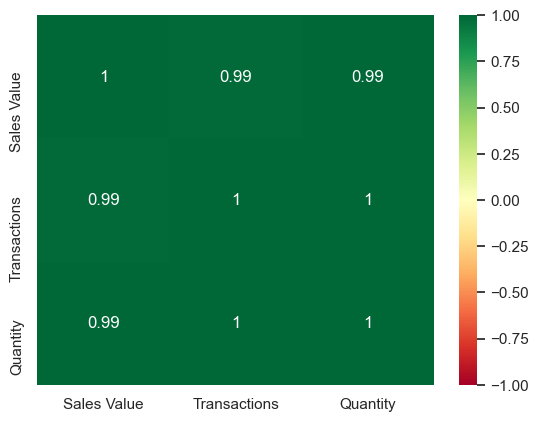

In [43]:
sns.heatmap(pd.DataFrame(data).corr(numeric_only=True), annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

### Box plots

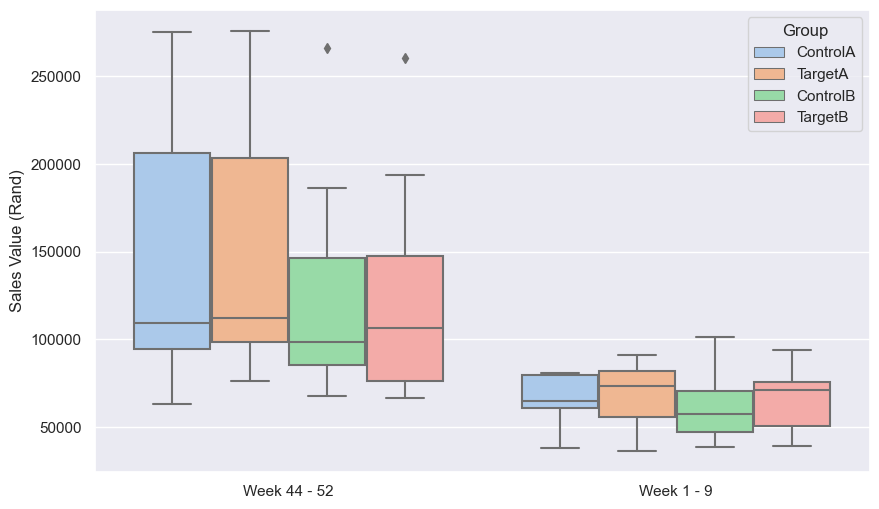

In [44]:
# Creating box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='DateLabel', y='Sales Value', data=data, palette='pastel', hue='Group')

# Adding labels and title
plt.ylabel('Sales Value (Rand)')
plt.xlabel('')
plt.show()

## (Naive) Frequentist Approach...

$H_0 \rightarrow$ Null Hypothesis ("There is no statistically significant difference between the control and target groups")

$H_1 \rightarrow$ Alternative Hypothesis ("There **is** a statistical significant difference between the control and target groups")

### Hypothesis Testing: t-test

- Data has small sample size (i.e. 9 sample weeks) per group

- Population variance is unknown

- Therefore, t-test is the most appropriate statistical test to use in order to compare the sample means

- **Assumptions**: samples are independent and distribution is normal

In [45]:
alpha = 0.05  # Set your significance level

# Performing two-sample t-test
t_statA, p_valueA = ttest_ind(control_groupA, target_groupA, equal_var=False)
t_statB, p_valueB = ttest_ind(control_groupB, target_groupB, equal_var=False)

# Printing the results
print("Group A:")
print(f"T-statistic: {t_statA}")
print(f"P-value: {p_valueA}")

if p_valueA < alpha:
    print("Null hypothesis rejected. There is a significant difference between the groups.")
else:
    print("Failed to reject the null hypothesis. There is no significant difference between the groups.")

print()
print("Group B:")
print(f"T-statistic: {t_statB}")
print(f"P-value: {p_valueB}")

if p_valueB < alpha:
    print("Null hypothesis rejected. There is a significant difference between the groups.")
else:
    print("Failed to reject the null hypothesis. There is no significant difference between the groups.")

Group A:
T-statistic: -0.1756137392469407
P-value: 0.8629018056569583
Failed to reject the null hypothesis. There is no significant difference between the groups.

Group B:
T-statistic: -0.41784640558993225
P-value: 0.6816216839308394
Failed to reject the null hypothesis. There is no significant difference between the groups.


### Power Analysis

#### "What is the probability of detecting a significant effect (assuming one exists)"

power = $P$(reject $H_0 | H_1$ is true)

In [46]:
alpha = 0.05  # Alpha level

sample_sizeA = len(target_groupA)  
effect_sizeA = np.absolute(control_groupA.mean() - target_groupA.mean())/((target_groupA.std() + control_groupA.std())/2)
sample_sizeB = len(target_groupB) 
effect_sizeB = np.absolute(control_groupB.mean() - target_groupB.mean())/((target_groupB.std() + control_groupB.std())/2)

analysis = TTestIndPower()

# Calculate statistical power for a two-sample t-test
powerA = analysis.solve_power(effect_size=effect_sizeA, nobs1=sample_sizeA, alpha=alpha, alternative='two-sided')
powerB = analysis.solve_power(effect_size=effect_sizeB, nobs1=sample_sizeB, alpha=alpha, alternative='two-sided')

print('The statistical power for the given parameters is:')
print(f"Group A - {100*powerA:.2f}%")
print(f"Group B - {100*powerB:.2f}%")

The statistical power for the given parameters is:
Group A - 5.32%
Group B - 6.79%


#### "How many samples do we need to reliably detect an effect?"

In [47]:
alpha = 0.05  # Set the significance level
power = 0.8  # Set the desired statistical power

# Perform power analysis to determine sample size
analysis = TTestIndPower()
sample_sizeA = analysis.solve_power(effect_size=effect_sizeA, alpha=alpha, power=power, alternative='two-sided')
sample_sizeB = analysis.solve_power(effect_size=effect_sizeB, alpha=alpha, power=power, alternative='two-sided')

print(f"The required sample size for a two-sample t-test is:")
print(f"Group A - {sample_sizeA:.0f}")
print(f"Group B - {sample_sizeB:.0f}")

The required sample size for a two-sample t-test is:
Group A - 2265
Group B - 405


##### Sample size approximation: $n \approx \frac{16 \sigma_{pooled} ^2}{\Delta ^2}$

In [48]:

sample_size_approxA = 16*((target_groupA.std() + control_groupA.std())/2)**2/(control_groupA.mean() - target_groupA.mean())**2
sample_size_approxB = 16*((target_groupB.std() + control_groupB.std())/2)**2/(control_groupB.mean() - target_groupB.mean())**2
print('The (approximate) required sample size for a two-sample t-test is:')
print(f"Group A - {sample_size_approxA:.0f}")
print(f"Group B - {sample_size_approxB:.0f}")

The (approximate) required sample size for a two-sample t-test is:
Group A - 2307
Group B - 412


## Bayesian Approach...

### Approximating the Posterior Distribution using Central Limit Theorem

**Assumtions**: The sample data is independent and identically distributed (i.i.d.)

In [49]:
def central_limit_theorem(population_sample, sample_size):
    sample_means = []
    Sample_Size = 100000
    for _ in range(Sample_Size):  # Number of iterations for sample means
        sample = np.random.choice(population_sample, sample_size, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)    
    return sample_means 

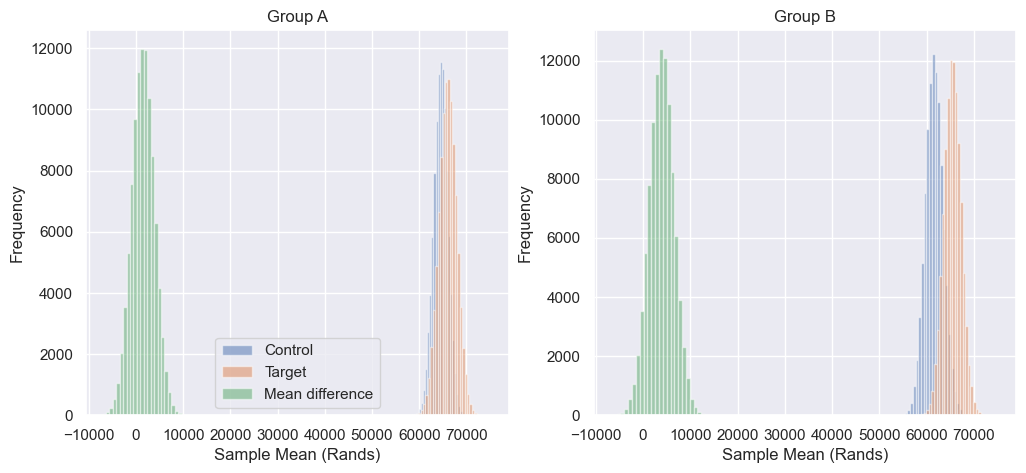

In [50]:
sample_means_controlA = central_limit_theorem(control_groupA, 100)
sample_means_targetA = central_limit_theorem(target_groupA, 100)
mean_differenceA = np.array(sample_means_targetA) - np.array(sample_means_controlA)

sample_means_controlB = central_limit_theorem(control_groupB, 100)
sample_means_targetB = central_limit_theorem(target_groupB, 100)
mean_differenceB = np.array(sample_means_targetB) - np.array(sample_means_controlB)

# set size of figure
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.hist(sample_means_controlA, bins=30, alpha=0.5, label='Control')
plt.hist(sample_means_targetA, bins=30, alpha=0.5, label='Target')
plt.hist(mean_differenceA, bins=30, alpha=0.5, label='Mean difference')
plt.title('Group A')
plt.xlabel('Sample Mean (Rands)')
plt.ylabel('Frequency')
plt.xlim(-10500, 79000)
plt.legend()

plt.subplot(122)
plt.hist(sample_means_controlB, bins=30, alpha=0.5, label='Control')
plt.hist(sample_means_targetB, bins=30, alpha=0.5, label='Target')
plt.hist(mean_differenceB, bins=30, alpha=0.5, label='Mean Difference')
plt.title('Group B')
plt.xlabel('Sample Mean (Rands)')
plt.ylabel('Frequency')
plt.xlim(-10500, 79000)
plt.show()

### Effect and Uncertainty

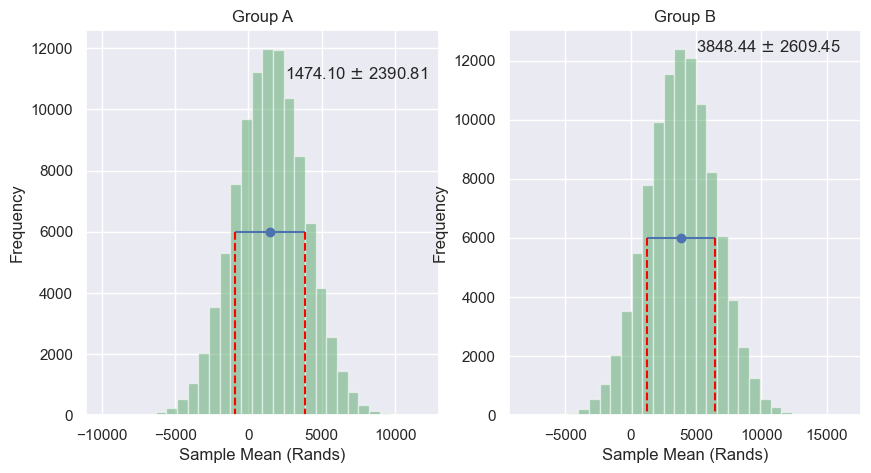

In [62]:
# set size of figure
plt.figure(figsize=(10, 5))

# Create the histogram
plt.subplot(121)
plt.hist(mean_differenceA, bins=30, alpha=0.5, color='g', label='Mean difference between posteriors')
plt.errorbar(np.mean(mean_differenceA), 6000, xerr=np.std(mean_differenceA), fmt='o')
plt.plot([np.mean(mean_differenceA)-np.std(mean_differenceA), np.mean(mean_differenceA)-np.std(mean_differenceA)], [6000,0], '--', color='red')
plt.plot([np.mean(mean_differenceA)+np.std(mean_differenceA), np.mean(mean_differenceA)+np.std(mean_differenceA)], [6000,0], '--', color='red')
plt.text(2500, 11000, f'{np.mean(mean_differenceA):.2f} $\pm$ {np.std(mean_differenceA):.2f}')
plt.title('Group A')
plt.xlabel('Sample Mean (Rands)')
plt.ylabel('Frequency')

# Create the histogram
plt.subplot(122)
plt.hist(mean_differenceB, bins=30, alpha=0.5, color='g', label='Mean difference between posteriors')
plt.errorbar(np.mean(mean_differenceB), 6000, xerr=np.std(mean_differenceB), fmt='o')
plt.plot([np.mean(mean_differenceB)-np.std(mean_differenceB), np.mean(mean_differenceB)-np.std(mean_differenceB)], [6000,0], '--', color='red')
plt.plot([np.mean(mean_differenceB)+np.std(mean_differenceB), np.mean(mean_differenceB)+np.std(mean_differenceB)], [6000,0], '--', color='red')
plt.text(5000, 12300, f'{np.mean(mean_differenceB):.2f} $\pm$ {np.std(mean_differenceB):.2f}')
plt.title('Group B')
plt.xlabel('Sample Mean (Rands)')
plt.ylabel('Frequency')
plt.show()

In [52]:
print("The average effect and associated uncertainty is:")
print(f"Group A - {np.mean(mean_differenceA):.2f} +/- {np.std(mean_differenceA):.2f}")
print(f"Group B - {np.mean(mean_differenceB):.2f} +/- {np.std(mean_differenceB):.2f}")

The average effect and associated uncertainty is:
Group A - 1474.10 +/- 2390.81
Group B - 3848.44 +/- 2609.45


### "What is the probability that the promotion had a positive effect?"

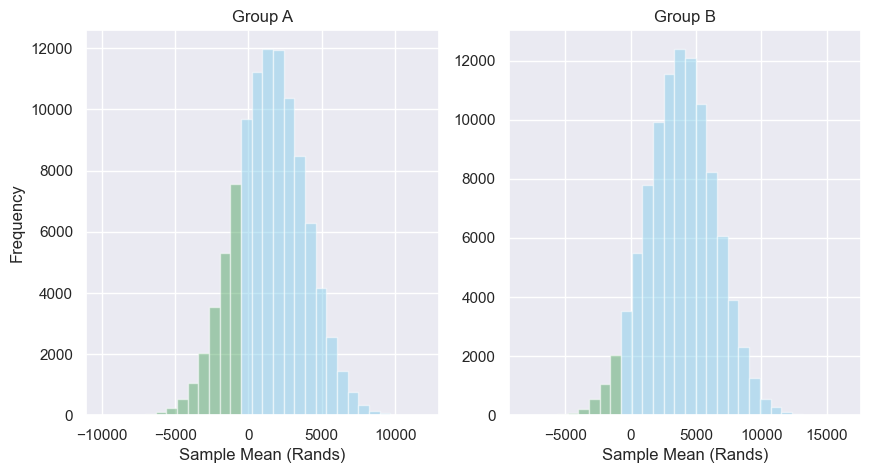

In [53]:
# set size of figure
plt.figure(figsize=(10, 5))

# Create the histogram
plt.subplot(121)
_, binsA, patchesA = plt.hist(mean_differenceA, bins=30, alpha=0.5, color='g', label='Mean difference between posteriors')

# Shade only the area where the bars are above zero
for i in range(len(patchesA)):
    if binsA[i+1] > 0:  # Check if the right edge of the bar is greater than zero
        patchesA[i].set_fc('skyblue')  # Set the color of the bar to skyblue

plt.title('Group A')
plt.xlabel('Sample Mean (Rands)')
plt.ylabel('Frequency')

# Create the histogram
plt.subplot(122)
_, binsB, patchesB = plt.hist(mean_differenceB, bins=30, alpha=0.5, color='g', label='Mean difference between posteriors')

# Shade only the area where the bars are above zero
for i in range(len(patchesB)):
    if binsB[i+1] > 0:  # Check if the right edge of the bar is greater than zero
        patchesB[i].set_fc('skyblue')  # Set the color of the bar to skyblue

plt.title('Group B')
plt.xlabel('Sample Mean (Rands)')
plt.show()

In [54]:
print("The probability that the promotion had a positive effect is:")
print(f"Group A - {100*np.mean(mean_differenceA > 0):.2f}%")
print(f"Group B - {100*np.mean(mean_differenceB > 0):.2f}%")

The probability that the promotion had a positive effect is:
Group A - 73.04%
Group B - 92.94%


### "What is the probability that the promotion resulted in an average loss of R5,000 (or more)?"

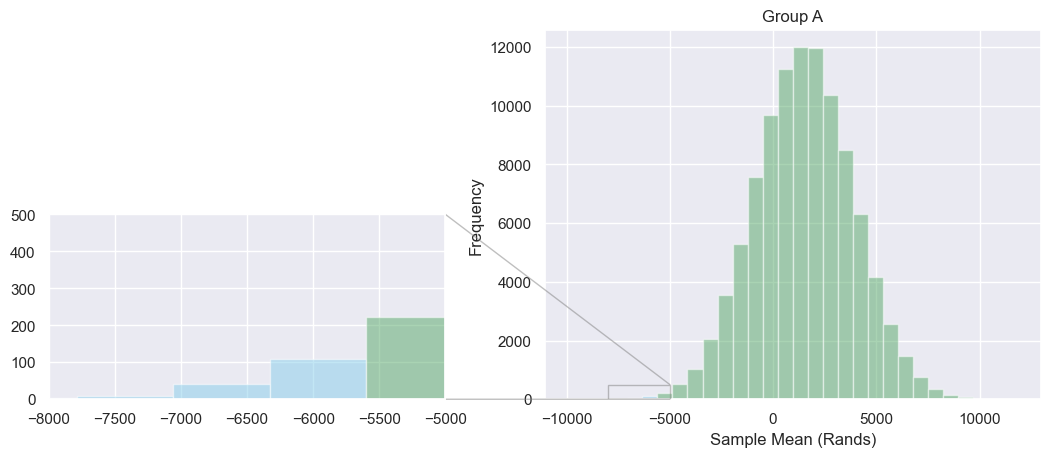

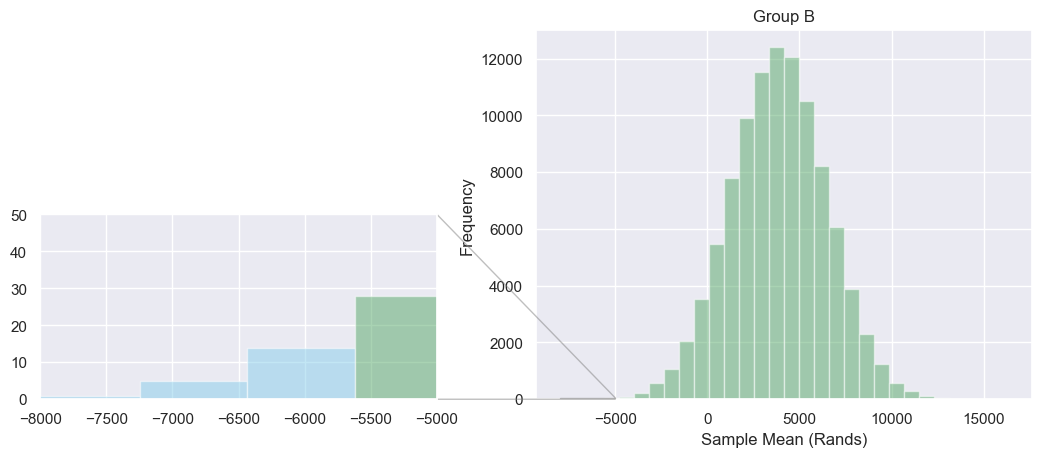

In [55]:
# Create the histogram
fig, axA = plt.subplots()
_, binsA, patchesA = plt.hist(mean_differenceA, bins=30, alpha=0.5, color='g', label='Mean difference between posteriors')

# Shade only the area where the bars are above zero
for i in range(len(patchesA)):
    if binsA[i+1] <= -5_000:  # Check if the right edge of the bar is greater than zero
        patchesA[i].set_fc('skyblue')  # Set the color of the bar to skyblue

axinA = axA.inset_axes([-1, 0, 0.8, 0.5])
_, binsA, patchesA = axinA.hist(mean_differenceA, bins=30, alpha=0.5, color='g', label='Mean difference between posteriors')

# Shade only the area where the bars are above zero
for i in range(len(patchesA)):
    if binsA[i+1] <= -5_000:  # Check if the right edge of the bar is greater than zero
        patchesA[i].set_fc('skyblue')  # Set the color of the bar to skyblue
axinA.set_xlim(-8000, -5000)
axinA.set_ylim(0, 500)
axA.indicate_inset_zoom(axinA)
plt.title('Group A')
plt.xlabel('Sample Mean (Rands)')
plt.ylabel('Frequency')

# Create the histogram
fig, axB = plt.subplots()
_, binsB, patchesB = plt.hist(mean_differenceB, bins=30, alpha=0.5, color='g', label='Mean difference between posteriors')

# Shade only the area where the bars are above zero
for i in range(len(patchesB)):
    if binsB[i+1] <= -5_000:  # Check if the right edge of the bar is greater than zero
        patchesB[i].set_fc('skyblue')  # Set the color of the bar to skyblue

axinB = axB.inset_axes([-1, 0, 0.8, 0.5])
_, binsB, patchesB = axinB.hist(mean_differenceB, bins=30, alpha=0.5, color='g', label='Mean difference between posteriors')

# Shade only the area where the bars are above zero
for i in range(len(patchesB)):
    if binsB[i+1] <= -5_000:  # Check if the right edge of the bar is greater than zero
        patchesB[i].set_fc('skyblue')  # Set the color of the bar to skyblue
axinB.set_xlim(-8000, -5000)
axinB.set_ylim(0, 50)
axB.indicate_inset_zoom(axinB)
plt.title('Group B')
plt.xlabel('Sample Mean (Rands)')
plt.ylabel('Frequency')
plt.show()

In [56]:
print("The probability that the promotion resulted in an average loss of R5,000 (or more) is:")
print(f"Group A -  {np.mean(mean_differenceA <= -5_000):.4f}%")
print(f"Group B - {np.mean(mean_differenceB <= -5_000):.5f}%")

The probability that the promotion resulted in an average loss of R5,000 (or more) is:
Group A -  0.0034%
Group B - 0.00040%


## Further Analysis: Redeemed vs Not Redeemed

### Promotion Redemption Table

In [57]:
redeemedvsnonredeemed

,Group,Redeemed vs Non-Redeemed,Sales Amount,Transactions,Sales Quantity,Customers
0,TargetA,Not Redeemed,503407.53,1905,2308,1260
1,TargetA,Redeemed,90668.54,304,369,171
2,TargetB,Not Redeemed,455860.56,2025,2474,1291
3,TargetB,Redeemed,133346.80,496,544,278


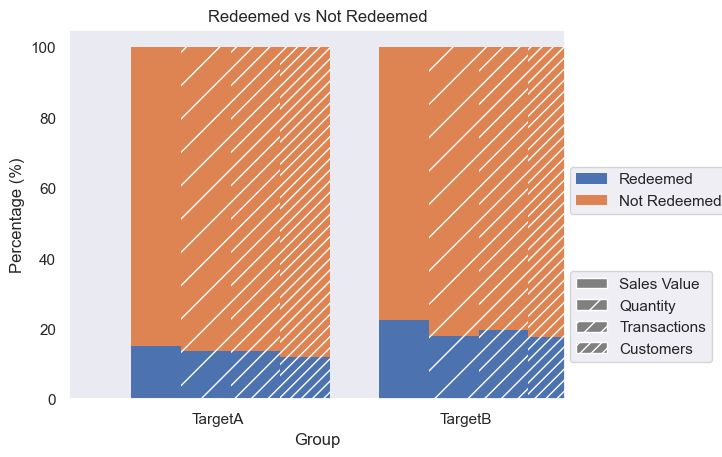

In [58]:
redeemed_sales = [90668.54, 133346.80]
non_redeemed_sales = [503407.53, 455860.56]
redeemed_transactions = [304, 496]
non_redeemed_transactions = [1905, 2025]
redeemed_sales_quantity = [369, 544]
non_redeemed_sales_quantity = [2308, 2474]
redeemed_customers = [171, 278]
non_redeemed_customers = [1260, 1291]

np1 = np.array([[90668.54, 133346.80], [503407.53, 455860.56]])

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

a_sales = 100*np.array([90668.54, 503407.53])/(90668.54+503407.53)
b_sales = 100*np.array([133346.80, 455860.56])/(133346.80+455860.56)

a_transactions = 100*np.array([304, 1905])/(304+1905)
b_transactions = 100*np.array([496, 2025])/(496+2025)

a_quantity = 100*np.array([369, 2308])/(369+2308)
b_quantity = 100*np.array([544, 2474])/(544+2474)

a_customers = 100*np.array([171, 1260])/(171+1260)
b_customers = 100*np.array([278, 1291])/(278+1291)

# create fake dataframes
sales = pd.DataFrame(np.array([a_sales, b_sales]),
                   index=["TargetA", "TargetB"],
                   columns=["Redeemed", "Not Redeemed"])
transactions = pd.DataFrame(np.array([a_transactions, b_transactions]),
                   index=["TargetA", "TargetB"],
                   columns=["Redeemed", "Not Redeemed"])
quantity = pd.DataFrame(np.array([a_quantity, b_quantity]),
                   index=["TargetA", "TargetB"],
                   columns=["Redeemed", "Not Redeemed"])
customers = pd.DataFrame(np.array([a_customers, b_customers]),
                   index=["TargetA", "TargetB"],
                   columns=["Redeemed", "Not Redeemed"])

# Then, just call :
plot_clustered_stacked([sales, quantity, transactions, customers],["Sales Value", "Quantity", "Transactions", "Customers"])
plt.title('Redeemed vs Not Redeemed')
plt.ylabel('Percentage (%)')
plt.xlabel('Group')
plt.show()
    

### Notable percentages

In [59]:
print('Percentage of target customers who redeemed (Weeks 1 - 9):')
print(f'Group A - {100*redeemedvsnonredeemed.Customers[1]/(redeemedvsnonredeemed.Customers[0] + redeemedvsnonredeemed.Customers[1]):.2f}%')
print(f'Group B - {100*redeemedvsnonredeemed.Customers[3]/(redeemedvsnonredeemed.Customers[2] + redeemedvsnonredeemed.Customers[3]):.2f}%')

Percentage of target customers who redeemed (Weeks 1 - 9):
Group A - 11.95%
Group B - 17.72%


In [60]:
print('Percentage of target customers who redeemed (Weeks 44 - 52 and Weeks 1 - 9):')
print(f'Group A - {100*redeemedvsnonredeemed.Customers[1]/(4993):.2f}%')
print(f'Group B - {100*redeemedvsnonredeemed.Customers[3]/(4989):.2f}%')

Percentage of target customers who redeemed (Weeks 44 - 52 and Weeks 1 - 9):
Group A - 3.42%
Group B - 5.57%


### Possible Reasons Why Customer Engagement is Low

- Insufficient awareness of promotion among target customers

- Difficulties with redeeming promotion (e.g. required loyalty cards to redeem promotion)

- Specific deal / category was not relevant to most of the target customers

## Summary

- Insufficient data to reliably use frequentist approach (refer to power analysis)

- Bayesian approach showed that the promotion campaign likely had a positive effect on sales for both Group A and B

- Promotion campaign for Group B was statistically more successful compared to promotion campaign for Group A

- Low ratio of customers that participated in the promotion for both Group A and B

## Recommendations for Future Promotion Campaigns

- Continue with Group B promotion campaign and abandon the group A promotion campaign

- Improve marketing techniques for target group, ensuring that they are aware of the promotion

- Improve the promotion offering to attract more customers and increase customer engagement from the target group

- Run promotion campaign over longer period to generate more data for future analyses

- Generate data on a daily basis (rather than weekly), as this will allow for a more granular analysis